In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
truenews = pd.read_csv('./data/True.csv') 
#truenews.head()
fakenews = pd.read_csv('./data/Fake.csv') 
#fakenews.head()

In [3]:

truenews = truenews.drop([ "subject","date"], axis = 1)
fakenews = fakenews.drop([ "subject","date"], axis = 1)

In [4]:
truenews['result'] = 0
fakenews['result'] = 1

In [5]:
truenews.head()

,title,text,result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [6]:
frames = [truenews, fakenews]
 
result = pd.concat(frames)

In [7]:
result.head()

,title,text,result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [8]:
result['title'] = result['title'].map(lambda x:  x.lower())
result['text'] = result['text'].map(lambda x:  x.lower())

In [9]:
import numpy as np
msk = np.random.rand(len(result)) < 0.8
train = result[msk].copy()
test=result[~msk].copy()
print(test)

                                                   title  \
14     man says he delivered manure to mnuchin to pro...   
18     u.s. appeals court rejects challenge to trump ...   
24     failed vote to oust president shakes up peru's...   
33     callista gingrich becomes trump's envoy to pop...   
43      u.s. house approves $81 billion for disaster aid   
...                                                  ...   
23463  eyewitness says feds ambushed bundys, 100 shot...   
23465  ‘there’ll be boots on the ground’: us making n...   
23468  ron paul on burns oregon standoff and jury nul...   
23469     boiler room: as the frogs slowly boil – ep #40   
23478  sunnistan: us and allied ‘safe zone’ plan to t...   

                                                    text  result  
14      (in dec. 25 story, in second paragraph, corre...       0  
18     (reuters) - a u.s. appeals court in washington...       0  
24     lima (reuters) - peru’s president pedro pablo ...       0  
33     vati

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punct(txt):
    text_remove_punct = [c for c in txt if c not in string.punctuation]
    return text_remove_punct

In [12]:
import re
def regular_expr(txt):
    txt = re.sub('[^a-zA-Z]',' ',str(txt))
    #txt = txt.split()
    return txt

In [13]:
#train['text'] = train['text'].map(lambda x:  remove_punct(x))
#test['text'] = test['text'].map(lambda x:  remove_punct(x))

train['text'] = train['text'].map(lambda x:  regular_expr(x))
test['text'] = test['text'].map(lambda x:  regular_expr(x))

In [134]:
#result['text'] = result['text'].map(lambda x:  regular_expr(x))

In [14]:
print(test['text'])

14         in dec     story  in second paragraph  corre...
18        reuters    a u s  appeals court in washington...
24       lima  reuters    peru s president pedro pablo ...
33       vatican city  reuters    callista gingrich  wi...
43       washington  reuters    the u s  house of repre...
                               ...                        
23463    patrick henningsen   st century wire update   ...
23465      st century wire says various parties in wash...
23468      st century wire says if you ve been followin...
23469    tune in to the alternate current radio network...
23478    patrick henningsen    st century wireremember ...
Name: text, Length: 9040, dtype: object


In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatiz(txt):
    txt = lemmatizer.lemmatize(txt)
    #txt = txt.split()
    return txt


In [16]:
train['text'] = train['text'].map(lambda x:  lemmatiz(x))
test['text'] = test['text'].map(lambda x:  lemmatiz(x))

In [17]:
print(train['text'])

0        washington  reuters    the head of a conservat...
1        washington  reuters    transgender people will...
2        washington  reuters    the special counsel inv...
3        washington  reuters    trump campaign adviser ...
4        seattle washington  reuters    president donal...
                               ...                        
23475    robert fantina counterpunchalthough the united...
23476      st century wire says as   wire reported earl...
23477      st century wire says it s a familiar theme  ...
23479      st century wire says al jazeera america will...
23480      st century wire says as   wire predicted in ...
Name: text, Length: 35858, dtype: object


In [18]:
def regular_token(txt):
    #txt = re.sub('[^a-zA-Z]',' ',str(txt))
    txt = txt.split()
    return txt

In [19]:
#train['text'] = train['text'].map(lambda x:  regular_token(x))
#test['text'] = test['text'].map(lambda x:  regular_token(x))

In [20]:
print(train['text'])

0        washington  reuters    the head of a conservat...
1        washington  reuters    transgender people will...
2        washington  reuters    the special counsel inv...
3        washington  reuters    trump campaign adviser ...
4        seattle washington  reuters    president donal...
                               ...                        
23475    robert fantina counterpunchalthough the united...
23476      st century wire says as   wire reported earl...
23477      st century wire says it s a familiar theme  ...
23479      st century wire says al jazeera america will...
23480      st century wire says as   wire predicted in ...
Name: text, Length: 35858, dtype: object


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 125772,lowercase = False, ngram_range = (1,2))
x_train = tfidf.fit_transform(train['text'])
x_test = tfidf.fit_transform(test['text'])
#print(tfidf.fit_transform(result['text'][0]))
#def regular_vectorize(txt):
#   return tfidf.fit_transform(txt)

In [35]:
pickle.dump(tfidf, open('./model/vectorizer.pkl','wb'))

In [22]:
#result['count'] = result['text'].map(lambda x:  regular_vectorize([x]))

In [23]:
print(x_test.shape)
print(x_train.shape)

(9040, 125772)
(35858, 125772)


In [24]:
print(result.count)

<bound method DataFrame.count of                                                    title  \
0      as u.s. budget fight looms, republicans flip t...   
1      u.s. military to accept transgender recruits o...   
2      senior u.s. republican senator: 'let mr. muell...   
3      fbi russia probe helped by australian diplomat...   
4      trump wants postal service to charge 'much mor...   
...                                                  ...   
23476  mcpain: john mccain furious that iran treated ...   
23477  justice? yahoo settles e-mail privacy class-ac...   
23478  sunnistan: us and allied ‘safe zone’ plan to t...   
23479  how to blow $700 million: al jazeera america f...   
23480  10 u.s. navy sailors held by iranian military ...   

                                                    text  result  
0      washington (reuters) - the head of a conservat...       0  
1      washington (reuters) - transgender people will...       0  
2      washington (reuters) - the special cou

In [44]:
from sklearn.naive_bayes import MultinomialNB 

clf = MultinomialNB()
y_train = train['result'].to_numpy()
clf.fit(x_train,y_train)
predict_test = clf.predict(x_test)

In [26]:
print(type(y_train))

<class 'numpy.ndarray'>


In [27]:
y_test = test['result'].to_numpy()

In [28]:
print(type(y_test))

<class 'numpy.ndarray'>


In [45]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predict_test[i]:
        count+=1
k = count/len(y_test)
print(f'Accuracy : {k}')

Accuracy : 0.6797566371681416


In [30]:
predict = clf.predict(x_train)

In [31]:
count = 0
for i in range(len(y_train)):
    if y_train[i] == predict[i]:
        count+=1
k = count/len(y_train)
print(f'Accuracy : {k}')

Accuracy : 0.9612917619499135


In [34]:
import pickle
pickle.dump(clf, open('./model/fake_news_nb.pkl','wb'))

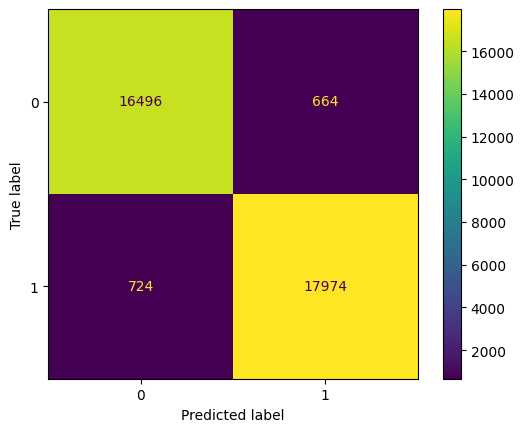

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_train, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [42]:
######Training Accuarcy

count = 0
True_Positive = 0
True_Negative = 0
False_Positive = 0
False_Negative = 0
for i in range(len(y_train)):
    if y_train[i] == predict[i]:
        if predict[i] == 1:
            True_Positive += 1
        else: 
            True_Negative += 1
    else:
        if predict[i] == 1:
            False_Positive += 1
        else: 
            False_Negative += 1

In [43]:
precision = True_Positive/(True_Positive + False_Positive)
recall = True_Positive/(True_Positive + False_Negative)

print(f' Training Precision : {precision}')
print(f'Training Recall : {recall}')
print(f'Training F1 : {2 * precision * recall /(precision + recall)}')

 Training Precision : 0.9643738598562077
Training Recall : 0.9612792812065462
Training F1 : 0.9628240839940004


In [47]:
##Test Accuracy


count = 0
True_Positive = 0
True_Negative = 0
False_Positive = 0
False_Negative = 0
for i in range(len(y_test)):
    if y_test[i] == predict_test[i]:
        if predict_test[i] == 1:
            True_Positive += 1
        else: 
            True_Negative += 1
    else:
        if predict_test[i] == 1:
            False_Positive += 1
        else: 
            False_Negative += 1

precision = True_Positive/(True_Positive + False_Positive)
recall = True_Positive/(True_Positive + False_Negative)

print(f' Testing Precision : {precision}')
print(f'Testing Recall : {recall}')
print(f'Testing F1 : {2 * precision * recall /(precision + recall)}')

 Testing Precision : 0.6662557238464248
Testing Recall : 0.7909261969475225
Testing F1 : 0.7232578147404647
